In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

In [3]:
# import data
gaming_data = pd.read_csv('data_cleanup/Gaming.csv', encoding='UTF-8')


Terminology:
- GAD-7 is the Generalized Anxiety Disorder survey used as an initial screening tool for generalized anxiety disorder. Each item is statement where scored from 0-3. with 0 being little to no anxiety, 3 being the most anxious.
- SWL is the Satisfaction with Life Scale. Each item is statement scored from 1-7. 1 being unsatisfied, 7 being ideal. 
- SPIN is the Social Phobia Inventory. Each item is a statement scored from 0-4. 0 being unbothered, 4 being most bothered.

Hypotheses:
1) Does playing League of Legends indicate a lower SWL?
    - League of Legends is known to have many toxic players. players are given many ways to socially disengage from the other players, i.e. muting chat and emotes, restricting chat access to different levels
    - initial hypothesis is that league players generally have a lower SWL (which is why they're generally unkind)
2) Do players who gravitate towards RPG games have higher GAD or SPIN scores?
    - initial hypothesis is that players who play RPG games typically have higher anxiety (general or social), and it fulfills the human need for interaction

In [39]:
# trim data
age_data = gaming_data[['Entry', 'Gender', 'Age', 'Game', 'Hours per Week', 
            'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GAD Total', 
            'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'SWL Total',
            'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8',
            'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15',
            'SPIN16', 'SPIN17', 'SPIN Total']]

age_data.head()

dtype('O')

In [49]:
# Categorize games
age_data['Category'] = ''
for index, row in age_data.iterrows():
    switch={
        'League of Legends': 'MOBA', 
        'Other': 'N/A', 
        'Starcraft 2' : 'RTS', 
        'Counter Strike':'FPS',
        'World of Warcraft':'MMORPG', 
        'Hearthstone':'CCG', 
        'Diablo 3':'RPG', 
        'Heroes of the Storm':'MOBA',
        'Guild Wars 2':'MMMORPG', 
        'Skyrim':'RPG', 
        'Destiny':'FPS'
    }
    age_data.loc[index, 'Category'] = switch.get(age_data.loc[index, 'Game'])

# Reorganize DataFrame
age_data = age_data[['Entry', 'Gender', 'Age', 'Game', 'Category', 'Hours per Week', 
            'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GAD Total', 
            'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'SWL Total',
            'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8',
            'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15',
            'SPIN16', 'SPIN17', 'SPIN Total']]
age_data

,Entry,Gender,Age,Game,Category,Hours per Week,GAD1,GAD2,GAD3,GAD4,...,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,SPIN Total
0,1,Male,25,Skyrim,RPG,15,0,0,0,0,...,0,0,0,0,0,1,0,1,0,5
1,2,Male,41,Other,N/A,8,1,2,2,2,...,4,0,3,0,1,3,3,1,2,33
2,3,Female,32,Other,N/A,0,0,2,2,0,...,0,1,1,3,0,2,4,4,2,31
3,4,Male,28,Other,N/A,20,0,0,0,0,...,0,0,1,3,0,0,1,0,0,11
4,5,Male,19,Other,N/A,20,2,1,2,2,...,2,0,1,0,0,0,0,3,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133,14246,Male,22,Other,N/A,40,1,0,0,1,...,0,0,0,0,0,0,1,0,0,7
11134,14247,Female,20,League of Legends,MOBA,20,3,3,3,3,...,2,1,4,0,2,2,1,0,1,25
11135,14248,Male,19,Starcraft 2,RTS,20,0,0,0,0,...,0,1,1,1,0,1,0,0,0,10
11136,14249,Female,18,Other,N/A,5,3,2,1,3,...,4,1,3,1,0,3,2,0,1,32


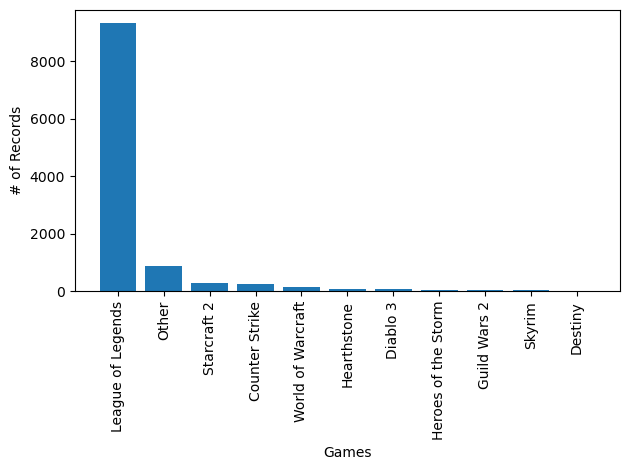

In [32]:
# show data skew
games_only = age_data['Game'].value_counts()
# plot games data to visualize. chose 
plt.bar(games_only.index, games_only)
plt.ylabel('# of Records')
plt.xlabel('Games')
plt.xticks(rotation=90)
plt.tight_layout()

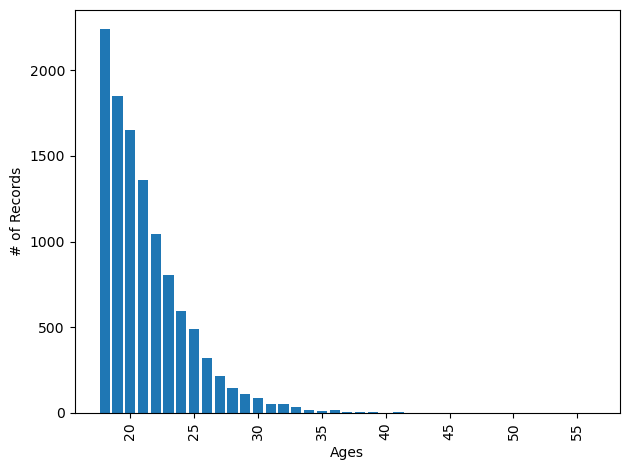

In [51]:
# show data skew
age_only = age_data['Age'].value_counts()
# plot games data to visualize. chose 
plt.bar(age_only.index, age_only)
plt.ylabel('# of Records')
plt.xlabel('Ages')
plt.xticks(rotation=90)
plt.tight_layout()

<BarContainer object of 9326 artists>

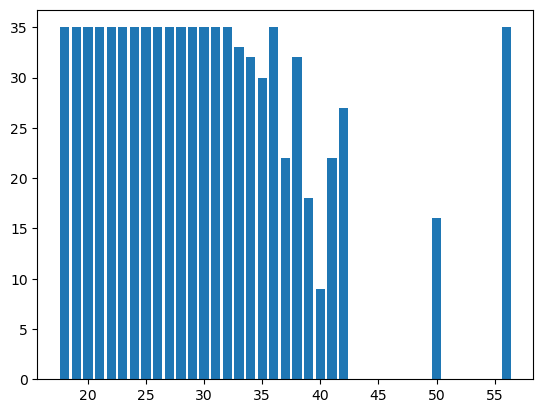

In [54]:
league_data = age_data[age_data['Game'] == 'League of Legends']
plt.bar(league_data['Age'],league_data['SWL Total'])